In [1]:
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy
import os,sys

# LRG Pk

In [3]:
W = np.zeros((500,2000))
M = np.zeros((2000,1200))
np.shape(np.matmul(W,M))

(500, 1200)

In [29]:
k_thy = np.linspace(0.0,0.5,500,endpoint=False) + 0.0005

ko = np.loadtxt('k.txt')

In [4]:
kmax_spline = 0.4
# np.linspace(0.0,kmax_spline,kmax_spline/0.001,endpoint=False) + 0.0005
int(kmax_spline/0.001)

400

In [18]:
for i in range(5): print(i)

0
1
2
3
4


In [58]:
k_thy = np.linspace(0.0,0.5,500,endpoint=False) + 0.0005

ko = np.loadtxt('k.txt')

Mmat = np.zeros((5*len(ko),3*len(k_thy)))
m = np.zeros((len(ko),len(k_thy)))

for i,ki in enumerate(ko):
    norm = (1./3.)* ( (k_thy[5*i + 4])**3 - (k_thy[5*i])**3 )
    for j in range(5):
        m[i,5*i + j] = (k_thy[5*i + j]**2)*0.001 / norm
        
for i,l in enumerate([0,2,4]):
    Mmat[len(ko)*l:len(ko)*l + len(ko),len(k_thy)*i:len(k_thy)*i + len(k_thy)] = (4./5.)*m
Mmat

array([[0.00659341, 0.05934066, 0.16483516, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.19999892, 0.20080375,
        0.20161019]])

In [57]:
Mmat[0,:6]

array([0.00659341, 0.05934066, 0.16483516, 0.32307692, 0.53406593,
       0.        ])

In [50]:
M_alt = np.zeros((5*len(ko),3*len(k_thy)))
m2 = np.zeros((len(ko),len(k_thy)))

for i,ki in enumerate(ko):
    for j in range(5):
        m2[i,5*i + j] = (1./5.)
for i,l in enumerate([0,2,4]):
    M_alt[len(ko)*l:len(ko)*l + len(ko),len(k_thy)*i:len(k_thy)*i + len(k_thy)] = m2
M_alt

array([[0.2, 0.2, 0.2, ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0.2, 0.2, 0.2]])

In [55]:
k_thy = np.linspace(0.0,0.5,500,endpoint=False) + 0.0005

ko = np.loadtxt('k.txt')

Mmat = np.zeros((5*len(ko),3*len(k_thy)))
m = np.zeros((len(ko),len(k_thy)))

for i,ki in enumerate(ko):
    norm = (1./3.)* ( (k_thy[5*i + 4])**3 - (k_thy[5*i])**3 )
    for j in range(5):
        m[i,5*i + j] = (k_thy[5*i + j]**2)*0.001 / norm
        
for i,l in enumerate([0,2,4]):
    Mmat[len(ko)*l:len(ko)*l + len(ko),len(k_thy)*i:len(k_thy)*i + len(k_thy)] = (4./5.)*m
Mmat

array([0.00379811, 0.00829934, 0.01293223, 0.0176484 , 0.02256549,
       0.02777644, 0.03269805, 0.03761648, 0.04263844, 0.04756514,
       0.05262096, 0.05756032, 0.06254738, 0.06757793, 0.07255917,
       0.07753384, 0.08251793, 0.08752752, 0.09254702, 0.09754963,
       0.10253196, 0.1075116 , 0.11251028, 0.11755008, 0.12253694,
       0.12752609, 0.1325302 , 0.13750627, 0.14251344, 0.14752592,
       0.15252994, 0.15749456, 0.16251893, 0.1675461 , 0.1725292 ,
       0.17753019, 0.18251476, 0.18753607, 0.19253236, 0.19751986,
       0.20251536, 0.20750884, 0.2125178 , 0.21750041, 0.22250931,
       0.22752895, 0.23252853, 0.23752765, 0.2424991 , 0.24749985,
       0.25252002, 0.25751822, 0.26252556, 0.26753055, 0.27254045,
       0.27753331, 0.28251238, 0.28751046, 0.29249713, 0.29750588,
       0.30251213, 0.30750103, 0.31251341, 0.31751596, 0.32252213,
       0.32751816, 0.33251237, 0.33749593, 0.34249191, 0.34751797,
       0.35250599, 0.35751401, 0.36252501, 0.36752303, 0.37251

In [87]:
Wmat = np.identity(5*len(ko))

In [70]:
# with open('Wmat.txt', 'w', encoding='utf-8') as f:
#     f.write('Hi EveryOne')

mat = np.matrix(Wmat)
    
with open('matrices/Wmat.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, encoding='utf-8')

In [61]:
mat = np.matrix(Mmat)
    
with open('matrices/Mmat.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, encoding='utf-8')

In [77]:
Mtest = np.loadtxt('Mmat.txt')
Mtest

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [11]:
kdat = np.loadtxt('k.txt')
P0dat = np.loadtxt('Pk_0.txt')
P2dat = np.loadtxt('Pk_2.txt')
# P4dat = np.loadtxt('Pk_4.txt')

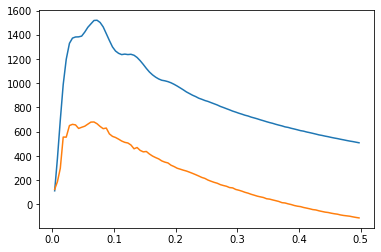

In [12]:
P0mean = []
P2mean = []
for i,x in enumerate(P0dat):
    # print(line)
    P0mean.append(np.mean(x))
    P2mean.append(np.mean(P2dat[i]))
    
plt.plot(kdat,kdat*P0mean)
plt.plot(kdat,kdat*P2mean)

In [89]:
Pkmat = np.zeros((len(P0dat),3))
# np.matrix([P0dat,P2dat,P4dat])
Pkmat[:,0] = kdat
Pkmat[:,1] = [x[1] for x in P0dat]
Pkmat[:,2] = [x[1] for x in P2dat]


In [63]:
for i in range(21):
    i+=4
    Pkmat = np.zeros((len(P0dat),3))
    # np.matrix([P0dat,P2dat,P4dat])
    Pkmat[:,0] = kdat
    Pkmat[:,1] = [x[i] for x in P0dat]
    Pkmat[:,2] = [x[i] for x in P2dat]

    Pkmat = np.matrix(Pkmat)
    with open('pk/z0.800/Pk_ph0{:02d}.txt'.format(i),'wb') as f:
        for line in Pkmat:
            np.savetxt(f, line, encoding='utf-8')

In [47]:
np.shape(np.loadtxt('covariances/cov.txt'))
np.shape(np.loadtxt('../rsd_data/covariances/cov_NGC_z1_n1000.dat'))

(80, 80)

In [7]:
path = '/global/project/projectdirs/desi/cosmosim/KP45/MC/Clustering/AbacusSummit/CubicBox/LRG/Pk/Pre/hector/dk0.005/Power_Spectrum_LRG_Abacus_z0.800_PCS_2inter_g512_Dk0005_run001.txt'


test = np.loadtxt(path)
test
kdat = test[:,0]



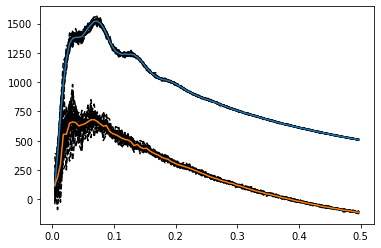

In [22]:
for i in range(25):
    dat = np.loadtxt('pk/z0.800/Pk_ph0{:02d}.txt'.format(i))
    plt.plot(dat[:,0],dat[:,0]*dat[:,1],'k--')
    plt.plot(dat[:,0],dat[:,0]*dat[:,2],'k--')
    
plt.plot(kdat,kdat*P0mean)
plt.plot(kdat,kdat*P2mean)

In [10]:
Pkmat = np.zeros((len(P0mean),3))
# np.matrix([P0dat,P2dat,P4dat])
Pkmat[:,0] = kdat
Pkmat[:,1] = P0mean
Pkmat[:,2] = P2mean

Pkmat = np.matrix(Pkmat)
with open('pk/z0.800/Pk_mean.txt','wb') as f:
    for line in Pkmat:
        np.savetxt(f, line, encoding='utf-8')


NameError: name 'P0mean' is not defined

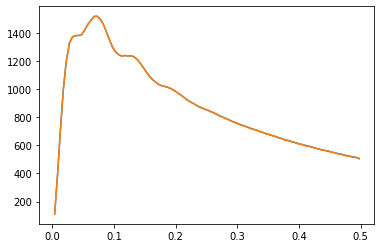

In [18]:
from copy import deepcopy
np.random.seed(0)
Pkmean = np.concatenate([P0mean,P2mean])
Pk_test = deepcopy(Pkmean) + np.random.uniform(-10,10,len(Pkmean))

plt.plot(kdat,kdat*Pkmean[:100])
plt.plot(kdat,kdat*Pk_test[:100])

In [19]:

cov_path = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/EZmock/CubicBox/LRG/Pk/jmena/nmesh_512/dk0.005/cov.txt'
cov0 = np.loadtxt(cov_path)
cov_cut = deepcopy(cov0[:200,:200])

diff = Pk_test - Pkmean
cinv = np.linalg.inv(cov_cut)

chi2 = np.dot(diff,np.dot(cinv,diff))
# np.dot(diff,np.dot(cinv,diff)[0])
# np.shape(np.dot(cinv,diff)[0,:])
chi2

62.38272321999794

In [20]:
covmat = np.matrix(cov_cut)
with open('covariances/cov_cut.txt','wb') as f:
    for line in covmat:
        np.savetxt(f, line, encoding='utf-8')

In [ ]:
ELG_path = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/AbacusSummit/CubicBox/ELG/Pk/Pre/hector/lowdens/dk001'

ELG_cov = np.loadtxt(ELG_path+'/cov/P02_kmax040_Abacusdata_ELGlowdens_covtest_1.cov')
ELG_invcov = np.loadtxt(ELG_path+'/cov/P02_kmax040_Abacusdata_ELGlowdens_covtest_1.invcov')

ELG_invcov_uncorr = np.linalg.inv(deepcopy(ELG_cov))

# ELG_cov / ELG_invcov
# np.shape(ELG_invcov)
# ELG_invcov/ELG_invcov_uncorr
np.matmul(ELG_invcov,np.linalg.inv(deepcopy(ELG_cov)))
# np.matmul(ELG_invcov,ELG_cov)


array([[ 8.70588059e+01, -2.86639269e+02, -7.53381251e+02, ...,
         2.17229923e+04,  1.14936328e+05, -1.53401825e+05],
       [ 9.33736424e+01,  8.70588834e+01,  2.94471270e+02, ...,
        -1.10874192e+05, -6.11403376e+04,  3.40292529e+03],
       [ 1.04028337e+01,  1.12741878e+02,  8.70587585e+01, ...,
         1.71176362e+04,  2.07121151e+04,  3.28286861e+04],
       ...,
       [-6.09023726e-02, -1.89780339e+00,  2.51468436e-01, ...,
         8.70588021e+01, -5.24632318e+01, -2.54288289e+02],
       [-1.87612616e-01, -1.57398205e-01,  2.55286837e-01, ...,
         9.50629290e+01,  8.70588545e+01, -5.64224313e+01],
       [ 6.77724326e-02, -3.99459632e-01,  3.55877907e-01, ...,
        -1.75491771e+02,  4.78648725e+01,  8.70588253e+01]])

In [53]:
diff = Pk_test - Pkmean
cinv = deepcopy(cov_cut) #np.linalg.inv(cov_cut)

np.dot(diff,np.dot(cinv,diff))

30678613851.702892

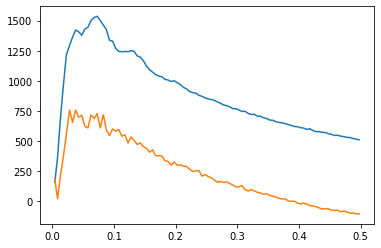

In [42]:

Pktest = np.loadtxt('LRG/pk/z0.800/Pk_ph016.txt')
# Pktest = np.loadtxt('../rsd_data/pk/mock_pk_NGC_z3.dat')
plt.plot(Pktest[:,0],Pktest[:,0]*Pktest[:,1])
plt.plot(Pktest[:,0],Pktest[:,0]*Pktest[:,2])
# Pktest

In [33]:
import sys
sys.path.append('/global/homes/m/mmaus/Python/velocileptors')
sys.path.append('/global/cscratch1/sd/mmaus/ShapeFit/emulator')
from emulator_pells import Emulator_Pells

json_file = '/global/cscratch1/sd/mmaus/ShapeFit/emulator/emu/boss_z_0.80_pkells.json'
json_other = '/global/cscratch1/sd/mmaus/ShapeFit/emulator/emu/boss_z_0.59_pkells.json'

emu = Emulator_Pells(json_file,order=3)

Loading Taylor series.


In [34]:

import sys
sys.path.append('/global/homes/m/mmaus/Python/velocileptors')
sys.path.append('/global/cscratch1/sd/mmaus/ShapeFit/emulator')
from emulator_pells import Emulator_Pells

json_file = '/global/cscratch1/sd/mmaus/ShapeFit/emulator/emu/boss_z_0.80_pkells.json'
json_other = '/global/cscratch1/sd/mmaus/ShapeFit/emulator/emu/boss_z_0.59_pkells.json'

emu = Emulator_Pells(json_file,order=3)

cpars = [0.46, 0.95,0.95, 0.03]

bpars = [1, 0.5, -2, 0,\
         3, -5, 15, 0,\
         1000, -2000, 0]

fsigma8, apar, aperp, m = cpars

kvec, p0, p2, p4= emu(cpars, bpars)


kvec,p0 = np.append([0.,],kvec),np.append([0.0,],p0)
p2 = np.append([0.,],p2)
p4 = np.append([0.0,],p4)
tt    = np.array([kvec,p0,p2,p4]).T

np.any(np.isnan(tt))

In [39]:
from scipy.interpolate import InterpolatedUnivariateSpline as Spline
from copy import deepcopy
# kv  = np.linspace(0.0,0.5,100,endpoint=False) + Pktest[0,0]
# kv = deepcopy(Pktest[:,0])
maxk = 0.5
kv  = np.linspace(0.0,maxk,int(maxk/0.001),endpoint=False) + 0.0005
thy =                     Spline(tt[:,0],tt[:,1],ext=3)(kv)
thy = np.concatenate([thy,Spline(tt[:,0],tt[:,2],ext=3)(kv)])
thy = np.concatenate([thy,Spline(tt[:,0],tt[:,3],ext=3)(kv)])

In [67]:
# np.any(np.isnan(thy)) or 
np.max(thy) > 1e8

False

In [50]:
Mtest = np.loadtxt('matrices/Mmat.txt')

In [59]:
convolved1 = np.matmul(Mmat,thy)
convolved2 = np.matmul(M_alt,thy)

In [48]:
5/4

1.25

In [130]:
# convolved1 / convolved2

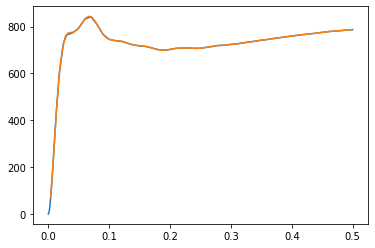

In [60]:
# plt.plot(Pktest[:,0],Pktest[:,0]*Pktest[:,1])
plt.plot(kvec,kvec*p2)
plt.plot(Pktest[:,0],Pktest[:,0]*convolved1[200:300])
# plt.plot(Pktest[:,0],Pktest[:,0]*convolved2[200:300])

In [9]:
w,v = np.linalg.eig(cov0)
w;v

array([[-8.24008160e-04, -1.52536208e-01,  6.99678900e-02, ...,
         4.86710523e-06,  7.21534511e-06,  1.53727960e-05],
       [ 9.69475130e-03,  3.63262661e-02,  5.18838976e-02, ...,
        -1.78876560e-05,  2.51766538e-05, -5.49979356e-05],
       [-5.14071346e-04,  4.91734855e-03, -9.14254118e-03, ...,
        -5.53681648e-05,  1.47267011e-04, -8.38180795e-05],
       ...,
       [ 1.24746542e-05, -1.54502836e-05,  3.34335655e-05, ...,
        -7.33832778e-02, -2.16187912e-02, -9.99720887e-02],
       [ 2.28993677e-05, -4.17018650e-07, -1.32809713e-05, ...,
        -6.26475462e-02, -4.48168005e-03, -9.78832210e-02],
       [ 5.33872551e-06,  4.78375537e-06, -6.85941230e-06, ...,
        -1.75180836e-01, -2.04431960e-02, -2.29806641e-01]])

In [25]:
for i in range(21):
    j=i+4
    name = 'ph0{:02d}'.format(j)
    print(j,name)
    os.mkdir('/global/cscratch1/sd/mmaus/ShapeFit/chains/abacus_mocks/LRG/'+name)

4 ph004
5 ph005
6 ph006
7 ph007
8 ph008
9 ph009
10 ph010
11 ph011
12 ph012
13 ph013
14 ph014
15 ph015
16 ph016
17 ph017
18 ph018
19 ph019
20 ph020
21 ph021
22 ph022
23 ph023
24 ph024


# ELG data

In [104]:
ELG_path = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/EZmock/CubicBox/ELG/Pk/team_clustering/'

#calculate <d>
dis = []
for i in range(1000): 
    dat = np.loadtxt(ELG_path + 'Power_Spectrum_EZmock_run{:04d}.dat'.format(i+1))
    d = np.concatenate([dat[:40,2],dat[:40,3]])
    dis.append(d)
    del dat,d


In [105]:
# dis = np.array(dis)
d_avg = np.mean(dis,axis=0)
np.shape(dis),np.shape(d_avg)

((1000, 80), (80,))

In [106]:
d_avg = np.mean(dis,axis=0)
np.shape(dis),np.shape(d_avg)
ELG_cov = np.zeros((80,80))
for i in range(1000):
    dvec = deepcopy(dis[i]) - deepcopy(d_avg)
    Ci = np.outer(dvec,dvec)
    ELG_cov += Ci / 1000.
    del dvec,Ci
    

In [145]:
np.shape(ELG_cov)

(80, 80)

In [107]:
# ELG_cov
ELG_invcov = np.linalg.inv(deepcopy(ELG_cov))
hcorr = (1000 - 80 - 2)/(1000-1)
ELG_invcov_corr = hcorr * deepcopy(ELG_invcov)

In [108]:
cov_fin = np.linalg.inv(deepcopy(ELG_invcov_corr))

In [121]:
aba_ELG_path = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/AbacusSummit/CubicBox/ELG/Pk/Pre/hector/lowdens/dk001/'

dat = np.loadtxt(aba_ELG_path + 'Power_Spectrum_ELGlowDens_Abacus_z1.100_PCS_2inter_g512_Dk001_run000.txt')
kdat = dat[:40,0]
Pdat0 = dat[:40,2]
Pdat2 = dat[:40,3]
Pdat = np.concatenate([Pdat0,Pdat2])

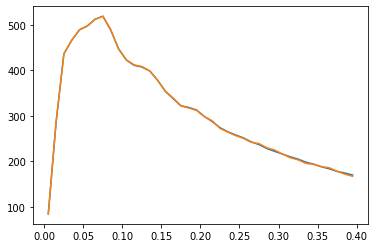

In [124]:
dtest = deepcopy(Pdat)  + np.random.uniform(-10,10,len(Pdat))
plt.plot(kdat,kdat*Pdat[:40])
plt.plot(kdat,kdat*dtest[:40])

In [125]:
diff = dtest - dis[0]
cinv = np.linalg.inv(cov_fin)

chi2 = np.dot(diff,np.dot(cinv,diff))
# np.dot(diff,np.dot(cinv,diff)[0])
# np.shape(np.dot(cinv,diff)[0,:])
chi2

3396.4556481840195

In [120]:
covmat = np.matrix(cov_fin)
with open('ELG/covariances/cov.txt','wb') as f:
    for line in covmat:
        np.savetxt(f, line, encoding='utf-8')

In [126]:
aba_ELG_path = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/AbacusSummit/CubicBox/ELG/Pk/Pre/hector/lowdens/dk001/'

for i in range(25):
    dat = np.loadtxt(aba_ELG_path + 'Power_Spectrum_ELGlowDens_Abacus_z1.100_PCS_2inter_g512_Dk001_run0{:02d}.txt'.format(i))

    Pkmat = np.zeros((40,3))
    # np.matrix([P0dat,P2dat,P4dat])
    Pkmat[:,0] = dat[:40,0]
    Pkmat[:,1] = dat[:40,2]
    Pkmat[:,2] = dat[:40,3]

    Pkmat = np.matrix(Pkmat)
    with open('ELG/pk/z1.10/ph0{:02d}.txt'.format(i),'wb') as f:
        for line in Pkmat:
            np.savetxt(f, line, encoding='utf-8')

In [140]:
k_thy = np.linspace(0.0,0.4,400,endpoint=False) + 0.0005

ko = np.loadtxt('ELG/pk/z1.10/ph000.txt')[:,0]

Mmat = np.zeros((5*len(ko),3*len(k_thy)))
m = np.zeros((len(ko),len(k_thy)))

for i,ki in enumerate(ko):
    norm = (1./3.)* ( (k_thy[10*i + 9])**3 - (k_thy[10*i])**3 )
    for j in range(10):
        m[i,10*i + j] = (k_thy[10*i + j]**2)*0.001 / norm
        
for i,l in enumerate([0,2,4]):
    Mmat[len(ko)*l:len(ko)*l + len(ko),len(k_thy)*i:len(k_thy)*i + len(k_thy)] = (9./10.)*m
Wmat = np.identity(5*len(ko))
Mmat

array([[0.0007874 , 0.00708661, 0.01968504, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.10126545, 0.1017756 ,
        0.10228703]])

In [142]:
Wmat = np.identity(5*len(ko))
mat = np.matrix(Wmat)
    
with open('ELG/matrices/Wmat.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, encoding='utf-8')

mat = np.matrix(Mmat)        
with open('ELG/matrices/Mmat.txt','wb') as f:
    for line in mat:
        np.savetxt(f, line, encoding='utf-8')

In [131]:
import sys
sys.path.append('/global/homes/m/mmaus/Python/velocileptors')
sys.path.append('/global/cscratch1/sd/mmaus/ShapeFit/emulator')
from emulator_pells import Emulator_Pells

json_file = '/global/cscratch1/sd/mmaus/ShapeFit/emulator/emu/boss_z_1.10_pkells.json'
# json_other = '/global/cscratch1/sd/mmaus/ShapeFit/emulator/emu/boss_z_0.59_pkells.json'

emu = Emulator_Pells(json_file,order=3)

cpars = [0.46, 0.95,0.95, 0.03]

bpars = [1, 0.5, -2, 0,\
         3, -5, 15, 0,\
         1000, -2000, 0]

fsigma8, apar, aperp, m = cpars

kvec, p0, p2, p4= emu(cpars, bpars)


kvec,p0 = np.append([0.,],kvec),np.append([0.0,],p0)
p2 = np.append([0.,],p2)
p4 = np.append([0.0,],p4)
tt    = np.array([kvec,p0,p2,p4]).T

np.any(np.isnan(tt))


Loading Taylor series.


False

In [132]:
from scipy.interpolate import InterpolatedUnivariateSpline as Spline
from copy import deepcopy
# kv  = np.linspace(0.0,0.5,100,endpoint=False) + Pktest[0,0]
# kv = deepcopy(Pktest[:,0])
maxk = 0.4
kv  = np.linspace(0.0,maxk,int(maxk/0.001),endpoint=False) + 0.0005
thy =                     Spline(tt[:,0],tt[:,1],ext=3)(kv)
thy = np.concatenate([thy,Spline(tt[:,0],tt[:,2],ext=3)(kv)])
thy = np.concatenate([thy,Spline(tt[:,0],tt[:,3],ext=3)(kv)])

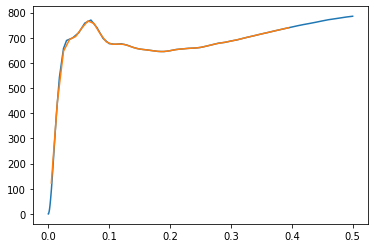

In [141]:
Pktest = np.loadtxt('ELG/pk/z1.10/ph000.txt')

convolved = np.matmul(Mmat,thy)
convolved = np.matmul(Wmat,convolved)

plt.plot(kvec,kvec*p2)
plt.plot(Pktest[:,0],Pktest[:,0]*convolved[80:120])

In [144]:
for i in range(25):
    # j=i+4
    name = 'ph0{:02d}'.format(i)
    print(i,name)
    os.mkdir('/global/cscratch1/sd/mmaus/ShapeFit/chains/abacus_mocks/ELG/'+name)

0 ph000
1 ph001
2 ph002
3 ph003
4 ph004
5 ph005
6 ph006
7 ph007
8 ph008
9 ph009
10 ph010
11 ph011
12 ph012
13 ph013
14 ph014
15 ph015
16 ph016
17 ph017
18 ph018
19 ph019
20 ph020
21 ph021
22 ph022
23 ph023
24 ph024


# LRG Cubic BAO

In [7]:
aba_xi0_path = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/AbacusSummit/CubicBox/LRG/Xi/Post/jmena/Xi_0.txt'
aba_xi2_path = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/AbacusSummit/CubicBox/LRG/Xi/Post/jmena/Xi_2.txt'
aba_s_path = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/AbacusSummit/CubicBox/LRG/Xi/Post/jmena/s.txt'

sdat = np.loadtxt(aba_s_path,encoding='utf-8')
xi0_dat = np.loadtxt(aba_xi0_path,encoding='utf-8')
xi2_dat = np.loadtxt(aba_xi2_path,encoding='utf-8')
np.shape(xi0_dat),len(sdat)
len(np.mean(xi0_dat,axis=1))

50

(30.0, 150.0)

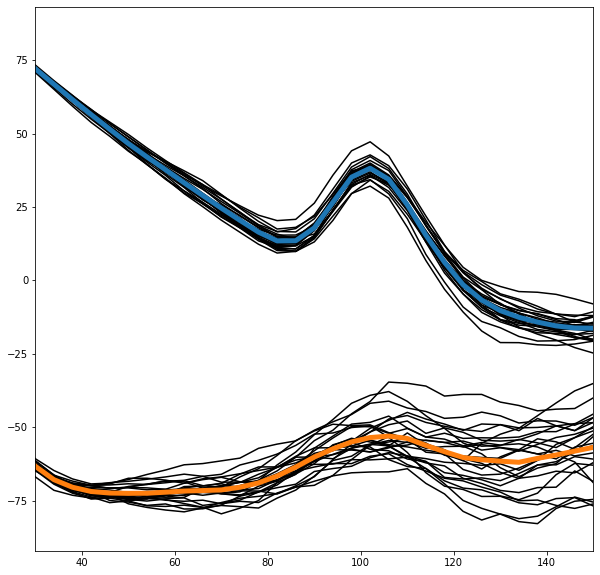

In [12]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.plot(sdat,sdat**2*xi0_dat[:,i],'k-')
    plt.plot(sdat,sdat**2*xi2_dat[:,i],'k-')
    
xi0_mean = np.mean(xi0_dat,axis=1)
xi2_mean = np.mean(xi2_dat,axis=1)
plt.plot(sdat,sdat**2*xi0_mean,'C0-',lw=5)
plt.plot(sdat,sdat**2*xi2_mean,'C1-',lw=5)
plt.xlim(30,150)

In [13]:
xi_mat = np.zeros((len(sdat),3))
xi_mat[:,0] = sdat
xi_mat[:,1] = xi0_mean
xi_mat[:,2] = xi2_mean

np.savetxt('LRG/Xi_post/xi_mean.txt',xi_mat,encoding='utf-8')

In [31]:
EZ_cov_path = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/EZmock/CubicBox/LRG/Xi/jmena/cov.txt'
cov = deepcopy(np.loadtxt(EZ_cov_path,encoding='utf-8'))
cov_cut = cov[:100,:100]
cov_mean = cov_cut/25.

In [32]:
pk_cov = np.loadtxt('LRG/covariances/cov_mean.txt')

# joint_cov = np.zeros((300,300))
# joint_cov[:200,:200] = pk_cov
# joint_cov[200:,200:] = cov_mean

# joint_cov[200:,200:]
# pk_cov
cov_mean

array([[ 1.31465943e-06,  5.44781118e-07,  2.94789743e-07, ...,
        -3.02619343e-09, -3.81549610e-09, -5.60823601e-09],
       [ 5.44781118e-07,  4.04655315e-07,  2.34659688e-07, ...,
        -2.33638950e-09, -2.11765968e-09, -2.70500263e-09],
       [ 2.94789743e-07,  2.34659688e-07,  1.78822038e-07, ...,
        -2.06912450e-09, -2.08393525e-09, -2.40556255e-09],
       ...,
       [-3.02619343e-09, -2.33638950e-09, -2.06912450e-09, ...,
         7.32916564e-09,  7.04916133e-09,  6.62910447e-09],
       [-3.81549610e-09, -2.11765968e-09, -2.08393525e-09, ...,
         7.04916133e-09,  7.22177997e-09,  7.00488719e-09],
       [-5.60823601e-09, -2.70500263e-09, -2.40556255e-09, ...,
         6.62910447e-09,  7.00488719e-09,  7.21545388e-09]])

In [23]:
EZ_xi0_path = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/EZmock/CubicBox/LRG/Xi/jmena/Xi_0.txt'
EZ_xi2_path = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/EZmock/CubicBox/LRG/Xi/jmena/Xi_2.txt'

EZ_pk0_path = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/EZmock/CubicBox/LRG/Pk/jmena/nmesh_512/dk0.005/Pk_0.txt'
EZ_pk2_path = '/global/cfs/cdirs/desi/cosmosim/KP45/MC/Clustering/EZmock/CubicBox/LRG/Pk/jmena/nmesh_512/dk0.005/Pk_2.txt'

pk0dat = np.loadtxt(EZ_pk0_path)
pk2dat = np.loadtxt(EZ_pk2_path)
xi0dat = np.loadtxt(EZ_xi0_path)
xi2dat = np.loadtxt(EZ_xi2_path)
#calculate <d>
dis = []
for i in range(1000): 
    # pk0dat = np.loadtxt(EZ_pk0_path)
    # pk0 = pk
    d = np.concatenate([pk0dat[:,i],pk2dat[:,i],xi0dat[:,i],xi2dat[:,i]])
    dis.append(d)
    del d

# len(np.concatenate([pk0dat[:,0],pk2dat[:,0],xi0dat[:,0],xi2dat[:,0]]))
np.shape(dis)

(1000, 300)

In [24]:
d_avg = np.mean(dis,axis=0)
# np.shape(dis),np.shape(d_avg)
joint_cov = np.zeros((300,300))
for i in range(1000):
    dvec = deepcopy(dis[i]) - deepcopy(d_avg)
    Ci = np.outer(dvec,dvec)
    joint_cov += Ci / 1000.
    del dvec,Ci

In [33]:
deepcopy(joint_cov[200:,200:])/25.

array([[ 1.31334477e-06,  5.44236337e-07,  2.94494953e-07, ...,
        -3.02316723e-09, -3.81168060e-09, -5.60262777e-09],
       [ 5.44236337e-07,  4.04250660e-07,  2.34425028e-07, ...,
        -2.33405311e-09, -2.11554202e-09, -2.70229763e-09],
       [ 2.94494953e-07,  2.34425028e-07,  1.78643216e-07, ...,
        -2.06705538e-09, -2.08185131e-09, -2.40315698e-09],
       ...,
       [-3.02316723e-09, -2.33405311e-09, -2.06705538e-09, ...,
         7.32183648e-09,  7.04211217e-09,  6.62247536e-09],
       [-3.81168060e-09, -2.11554202e-09, -2.08185131e-09, ...,
         7.04211217e-09,  7.21455819e-09,  6.99788230e-09],
       [-5.60262777e-09, -2.70229763e-09, -2.40315698e-09, ...,
         6.62247536e-09,  6.99788230e-09,  7.20823843e-09]])

In [34]:
# joint_cov_mean = joint_cov/25.
# joint_cov_mean[200:,200:]
deepcopy(np.loadtxt('LRG/covariances/joint_rsdBAO_cov_mean.txt'))[200:,200:]

array([[ 1.31334477e-06,  5.44236337e-07,  2.94494953e-07, ...,
        -3.02316723e-09, -3.81168060e-09, -5.60262777e-09],
       [ 5.44236337e-07,  4.04250660e-07,  2.34425028e-07, ...,
        -2.33405311e-09, -2.11554202e-09, -2.70229763e-09],
       [ 2.94494953e-07,  2.34425028e-07,  1.78643216e-07, ...,
        -2.06705538e-09, -2.08185131e-09, -2.40315698e-09],
       ...,
       [-3.02316723e-09, -2.33405311e-09, -2.06705538e-09, ...,
         7.32183648e-09,  7.04211217e-09,  6.62247536e-09],
       [-3.81168060e-09, -2.11554202e-09, -2.08185131e-09, ...,
         7.04211217e-09,  7.21455819e-09,  6.99788230e-09],
       [-5.60262777e-09, -2.70229763e-09, -2.40315698e-09, ...,
         6.62247536e-09,  6.99788230e-09,  7.20823843e-09]])

In [36]:
np.savetxt('LRG/covariances/joint_rsdBAO_cov_mean.txt',joint_cov_mean,encoding='utf-8')

In [4]:
# sys.path.append('../emulator/fullshape_omb/abacus_fid/')
sys.path.append('/global/homes/m/mmaus/Python/velocileptors')

In [14]:
from compute_xiell_tables import compute_xiell_tables
from make_pkclass import make_pkclass_dists
from taylor_approximation import taylor_approximate

z=0.8
pkclass,fid_dists = make_pkclass_dists(z=z)

h = pkclass.h()
omega_b = 0.02237
omega_cdm = 0.12
sig8 = pkclass.sigma(8,z=0,h_units=True)
pars = [0.0225,0.115,0.68,0.77]

rmin, rmax, dr = 50, 160, 0.5
xi0, xi2= compute_xiell_tables(pars,z=z,fid_dists=fid_dists, rmin=rmin, rmax=rmax, dr=dr)

125 185
125 184


In [16]:
import json
emu_basedir = '/pscratch/sd/m/mmaus/new_template/Cobaya_template/emulator/fullshape_omb/abacus_fid/emu'
json_file = open(emu_basedir+'/boss_z_0.80_xiells.json', 'r')
emu = json.load( json_file )
json_file.close()

x0s = emu['x0']
rvec = emu['rvec']
derivs_x0 = [np.array(ll) for ll in emu['derivs0']]
derivs_x2 = [np.array(ll) for ll in emu['derivs2']]

taylors_xi = {}

taylors_xi['x0'] = np.array(x0s)
taylors_xi['rvec'] = np.array(rvec)
taylors_xi['derivs_xi0'] = derivs_x0
taylors_xi['derivs_xi2'] = derivs_x2

# taylors_xi[zstr] = taylors_xi
x0s = taylors_xi['x0']
derivs_xi0 = taylors_xi['derivs_xi0']
derivs_xi2 = taylors_xi['derivs_xi2']

rv = taylors_xi['rvec']
xi0table = taylor_approximate(pars, x0s, derivs_xi0, order=3)
xi2table = taylor_approximate(pars, x0s, derivs_xi2, order=3)

In [21]:
np.shape(xi2table),len(rv)

((220, 6), 220)

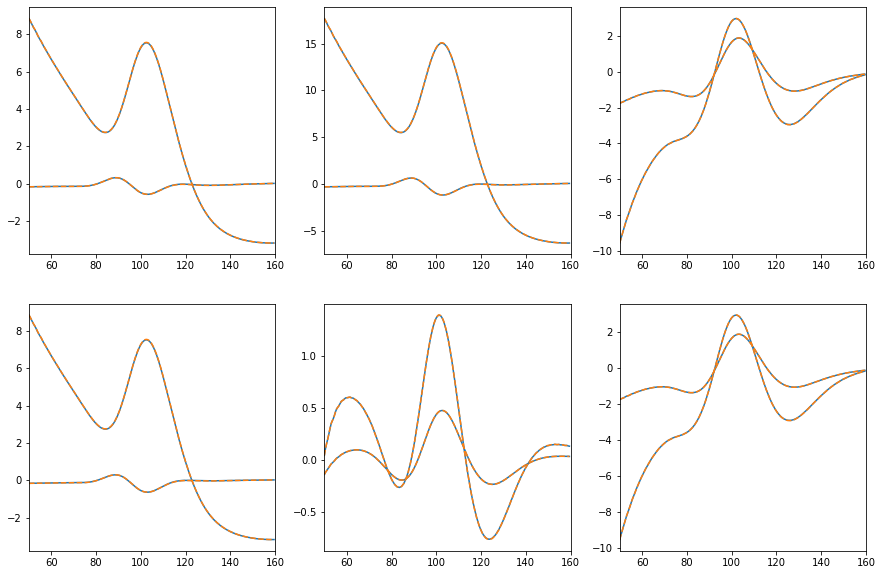

In [22]:
fig,axes = plt.subplots(2,3,figsize=(15,10))
ax = axes.ravel()

for i in range(6):
    ax[i].plot(rv,rv**2*xi0[:,i],'C0-',label='theory')
    ax[i].plot(rv,rv**2*xi2[:,i],'C0-')
    
    ax[i].plot(rv,rv**2*xi0table[:,i],'C1--',label='emu')
    ax[i].plot(rv,rv**2*xi2table[:,i],'C1--')
    
    ax[i].set_xlim(50,160)